In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Problem 1 : Prepare a classification model using SVM for salary data

In [416]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1) (1).csv


#EDA

In [418]:
train=pd.read_csv('SalaryData_Train(1).csv')
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [419]:
train.shape

(30161, 14)

In [420]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [421]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [422]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [423]:
train.duplicated().sum()

3258

In [424]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [425]:
train.drop_duplicates(inplace=True)

In [426]:
train.duplicated().sum()

0

In [427]:
train.shape

(26903, 14)

In [428]:
train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [429]:
len(train['workclass'].unique())

7

In [430]:
train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [431]:
train['educationno'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2])

In [432]:
train['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [433]:
train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [434]:
train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [435]:
train['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [436]:
train['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [437]:
len(train['capitalgain'].unique())

118

In [438]:
len(train['capitalloss'].unique())

90

In [439]:
len(train['hoursperweek'].unique())

94

In [440]:
train['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [441]:
len(train['native'].unique())

40

In [442]:
train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [443]:
train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

#Visualization

In [444]:
train.head(1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


<Axes: xlabel='workclass'>

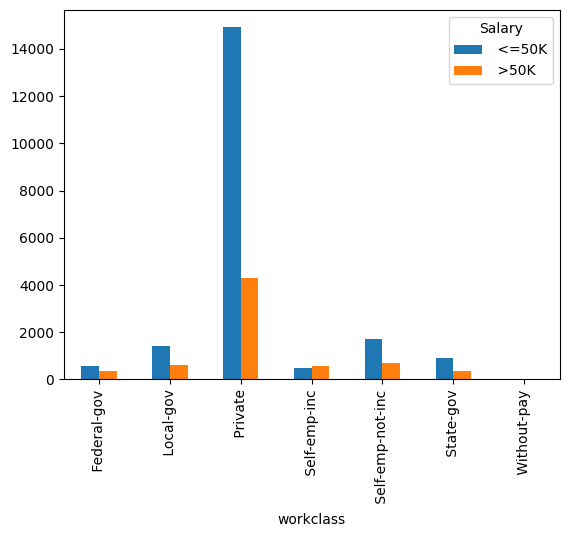

In [445]:
pd.crosstab(train['workclass'], train['Salary']).plot(kind='bar')

<Axes: xlabel='education'>

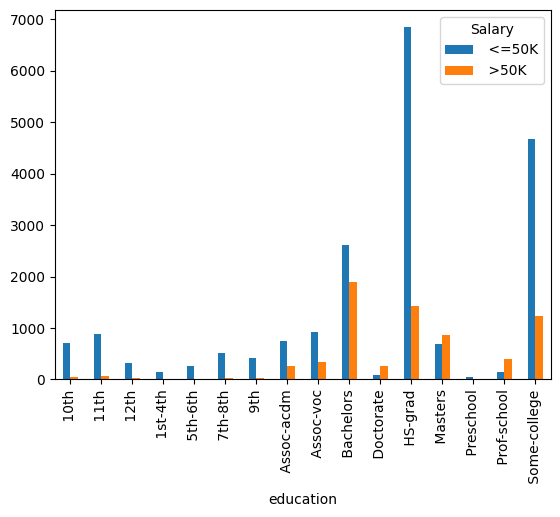

In [446]:
pd.crosstab(train['education'], train['Salary']).plot(kind='bar')

In [447]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

<Axes: xlabel='maritalstatus'>

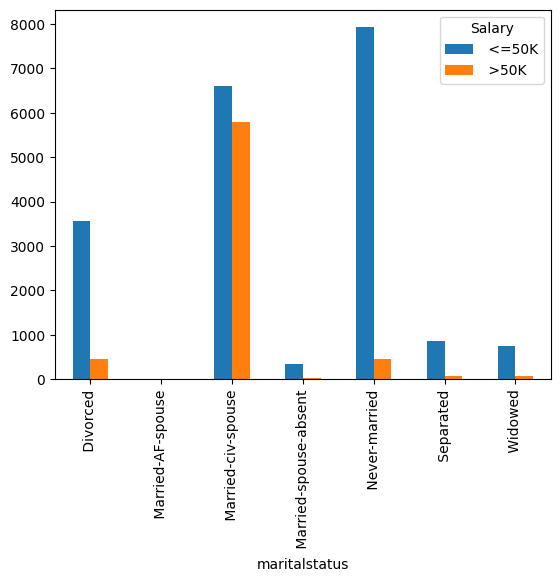

In [448]:
pd.crosstab(train['maritalstatus'], train['Salary']).plot(kind='bar')

<Axes: xlabel='occupation'>

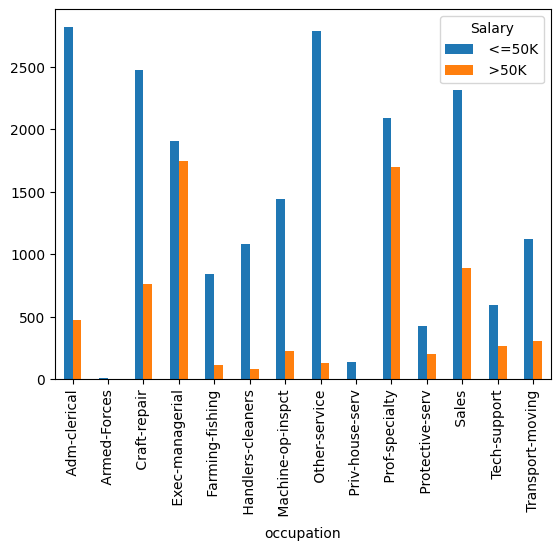

In [449]:
pd.crosstab(train['occupation'], train['Salary']).plot(kind='bar')

<Axes: xlabel='race'>

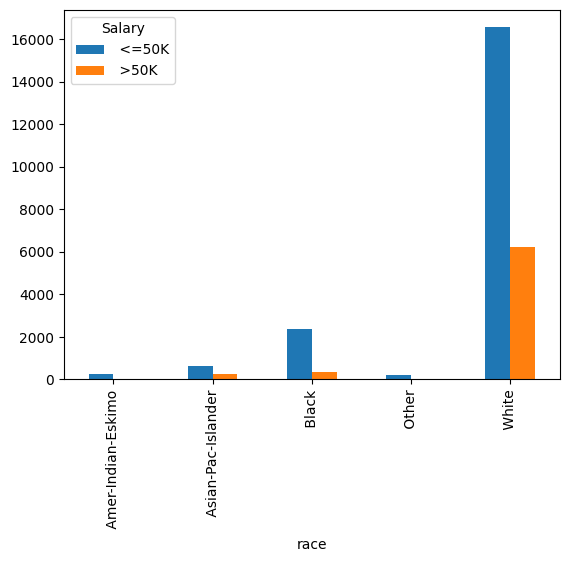

In [450]:
pd.crosstab(train['race'], train['Salary']).plot(kind='bar')

<Axes: xlabel='sex'>

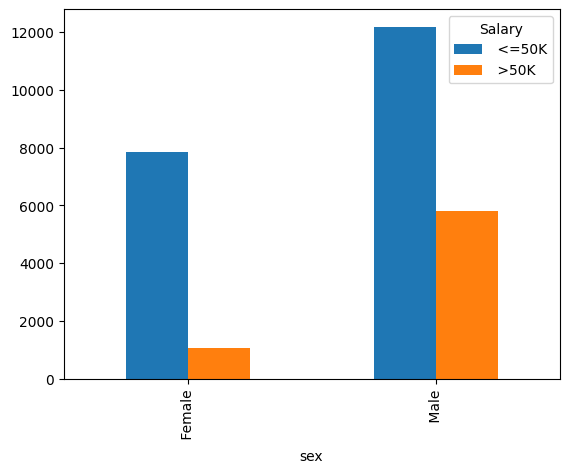

In [451]:
pd.crosstab(train['sex'], train['Salary']).plot(kind='bar')

<Axes: xlabel='native'>

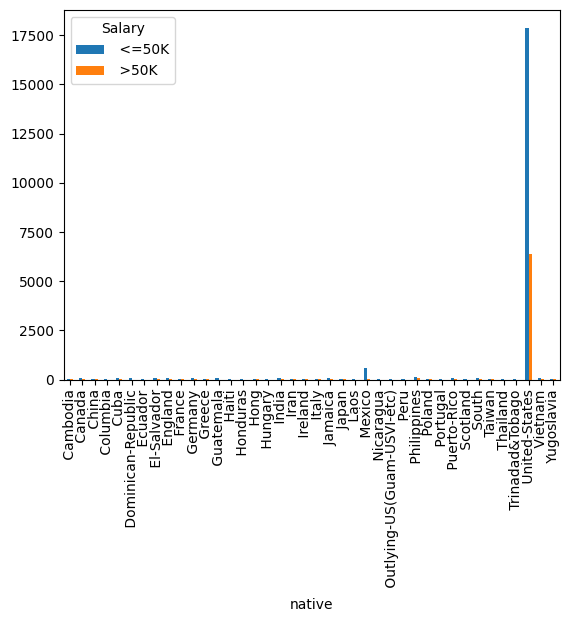

In [452]:
pd.crosstab(train['native'], train['Salary']).plot(kind='bar')

In [453]:
train.corr()

<ipython-input-453-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


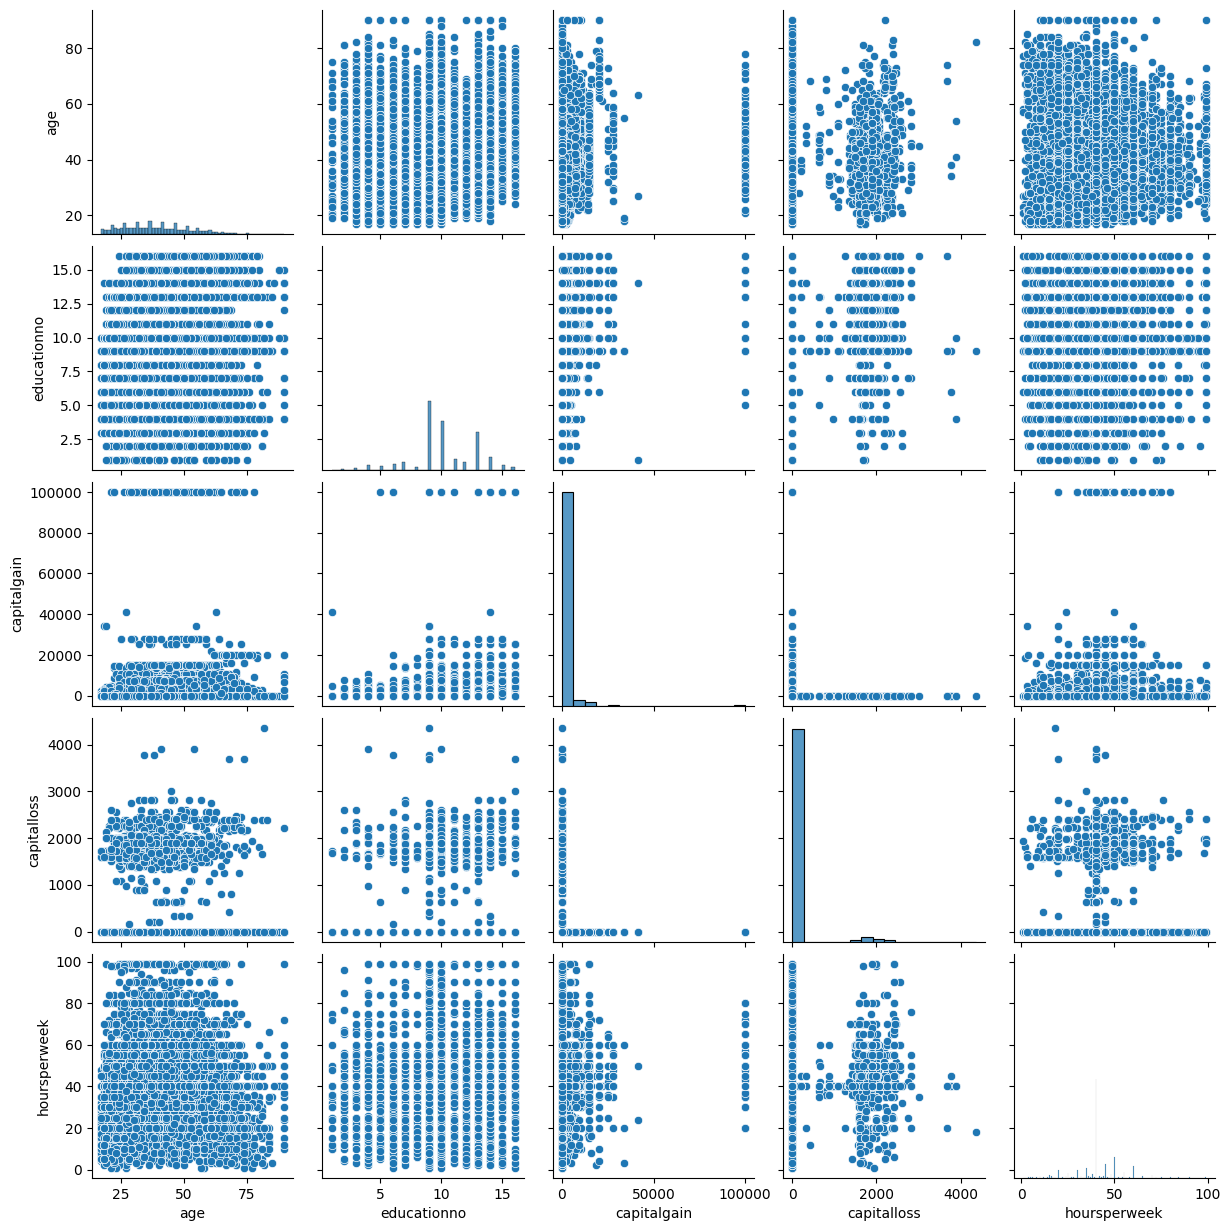

In [454]:
sns.pairplot(train)

<Axes: ylabel='workclass'>

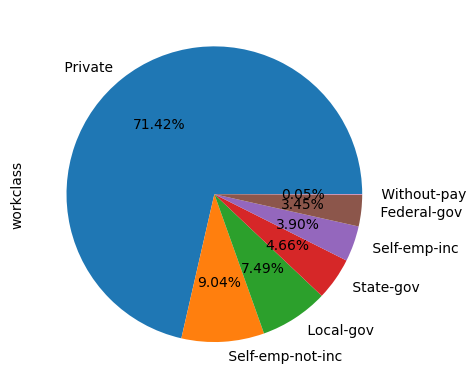

In [455]:
train['workclass'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='education'>

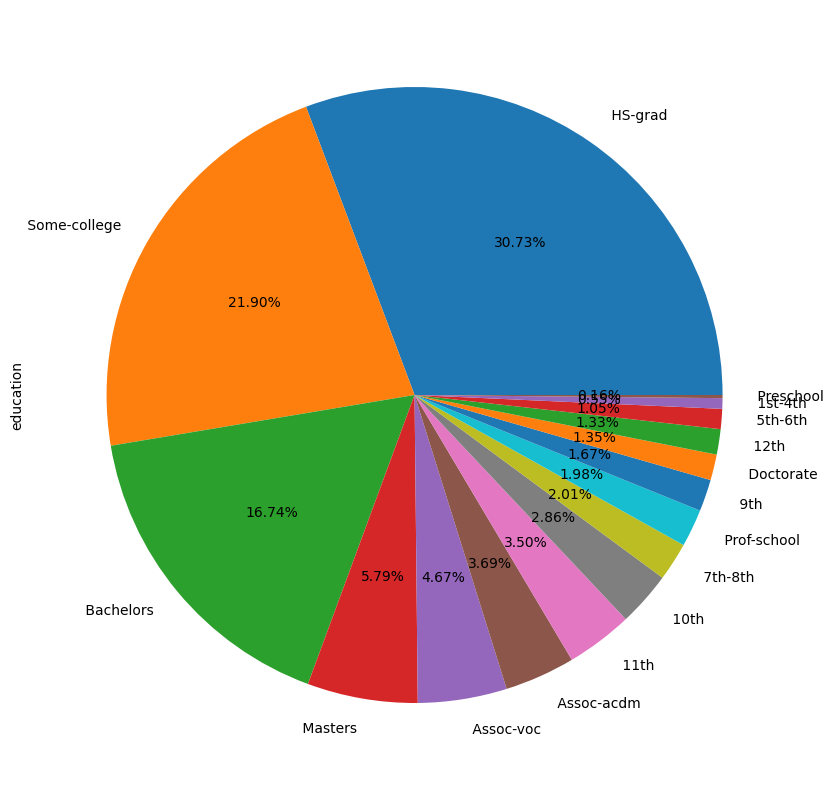

In [456]:
train['education'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(10,10))

<Axes: ylabel='occupation'>

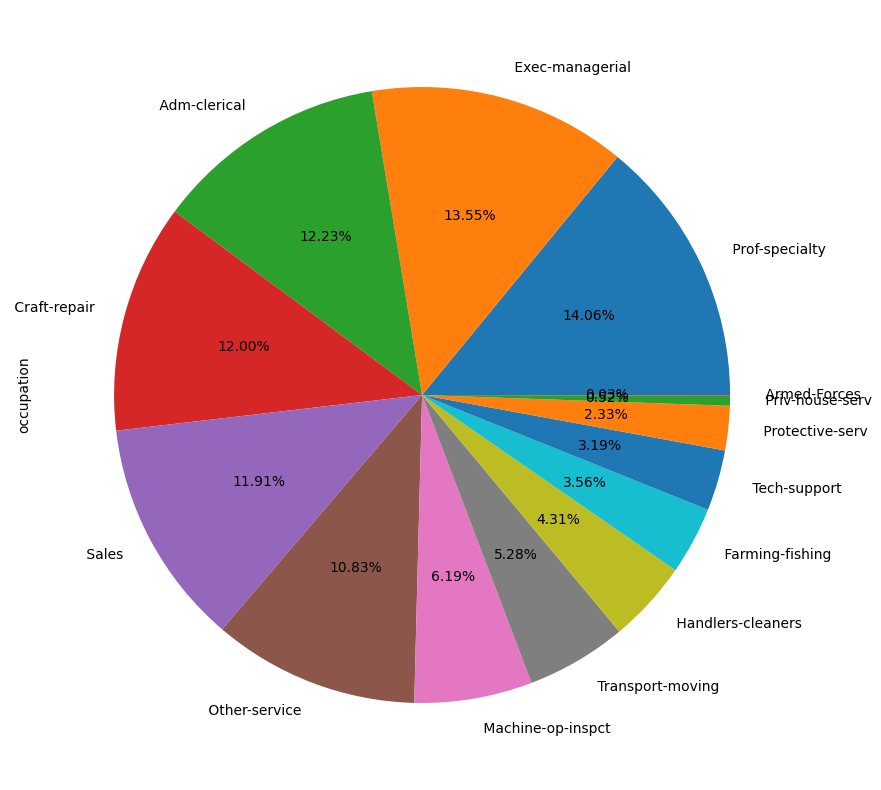

In [457]:
train['occupation'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(10,10))

<Axes: ylabel='race'>

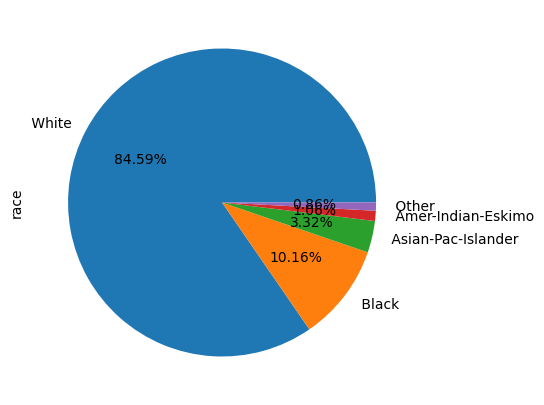

In [458]:
train['race'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(5,5))

#model building

In [459]:
train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [460]:
train=pd.get_dummies(train, columns=['workclass', 'education','maritalstatus','occupation','relationship','race','sex', 'native'], drop_first=True)

In [461]:
train.head(1)

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [462]:
train.shape

(26903, 95)

In [463]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train[['age','educationno','capitalgain','capitalloss','hoursperweek']]=scaler.fit_transform(train[['age','educationno','capitalgain','capitalloss','hoursperweek']])

In [464]:
train.head(1)

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,-0.003726,1.089919,0.12281,-0.23133,-0.094323,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [465]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1) (2).csv


In [466]:
test=pd.read_csv('SalaryData_Test(1).csv')
test.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [467]:
test.shape

(15060, 14)

In [468]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [469]:
test.duplicated().sum()

930

In [470]:
test.drop_duplicates(inplace=True)

In [471]:
test.duplicated().sum()

0

In [472]:
test=pd.get_dummies(test,columns=['workclass', 'education','maritalstatus','occupation','relationship','race','sex', 'native'], drop_first=True )

In [473]:
test[['age','educationno','capitalgain','capitalloss','hoursperweek']]=scaler.fit_transform(test[['age','educationno','capitalgain','capitalloss','hoursperweek']])

In [474]:
test.head(2)

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,-1.054088,-1.199146,-0.150059,-0.226108,-0.087538,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.086038,-0.430644,-0.150059,-0.226108,0.727617,<=50K,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [475]:
X_test=test.drop('Salary', axis=1)
Y_test=test['Salary']

In [476]:
X_test.shape

(14130, 94)

In [477]:
Y_test.shape

(14130,)

In [478]:
from sklearn.svm import SVC      #kernel='linear'
model=SVC(kernel='linear')
X=train.drop('Salary', axis=1)
Y=train['Salary']

In [479]:
model.fit(X,Y)
pred_L=model.predict(X_test)
acc_L=np.mean(Y_test==pred_L)
acc_L

0.8455060155697098

In [480]:
#kernel='poly'
model_P=SVC(kernel='poly')
model_P.fit(X,Y)
pred_P=model_P.predict(X_test)
acc_P=np.mean(Y_test==pred_P)
acc_P

0.848690728945506

In [481]:
#kernel='rbf'
model_R=SVC(kernel='rbf', probability=True)
model_R.fit(X,Y)
pred_R=model_R.predict(X_test)
acc_R=np.mean(Y_test==pred_R)
acc_R

0.851521585279547

In [482]:
#model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=10)
model=SVC(kernel='rbf')
results=cross_val_score(model, X,Y, cv=kf)
np.mean(results)*100

84.79723130523193

In [483]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
classification_report=classification_report(Y_test, pred_R)
print(classification_report)

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.90     10620
        >50K       0.75      0.60      0.67      3510

    accuracy                           0.85     14130
   macro avg       0.81      0.77      0.79     14130
weighted avg       0.85      0.85      0.85     14130



In [484]:
confusion_matrix(Y_test, pred_R)

array([[9937,  683],
       [1415, 2095]])

In [485]:
#kernel='sigmoid'
model_S=SVC(kernel='sigmoid')
model_S.fit(X,Y)
pred_S=model_S.predict(X_test)
acc_S=np.mean(Y_test==pred_S)
acc_S

0.7582448690728946

In [486]:
#highest accuracy of 85% is obtained when kernel is rbf

In [487]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca_train=pd.DataFrame(pca.fit_transform(X))
pca_train

,0,1,2,3,4,5,6,7,8,9
0,0.520923,-1.023186,0.064252,0.363513,-0.691625,0.567169,0.164554,1.047657,-0.140631,0.286874
1,0.211058,0.094171,0.109942,2.230573,-1.452266,-1.100836,0.022331,0.684775,0.097637,0.049850
2,-0.526622,0.298294,0.159073,-0.242101,0.085066,0.381980,-0.525853,0.401174,-0.638506,-0.028423
3,-0.248930,1.634209,0.400902,-0.077341,0.077666,-0.284454,0.158642,-0.545723,0.089200,1.187569
4,0.229888,-1.271791,-0.146649,0.154273,-0.653937,-0.484126,-0.442706,-1.207723,0.641028,0.707190
...,...,...,...,...,...,...,...,...,...,...
26898,1.370651,0.016587,0.031814,0.537071,-1.234153,-0.491522,-0.064754,-0.294605,-0.522148,0.024585
26899,-0.972287,-1.128601,-0.090064,-0.407307,0.211244,0.303201,0.798007,0.336162,-0.495871,0.044772
26900,-0.162844,-0.940201,-0.092815,0.085744,-0.354181,-0.678619,-0.220832,-0.751830,0.116834,-0.670966
26901,0.065189,1.422480,0.373723,0.314720,-0.426060,0.872400,-0.700969,-0.583787,0.146866,-0.610701


In [488]:
pca.explained_variance_ratio_

array([0.16726495, 0.12380479, 0.11851287, 0.10485115, 0.097729  ,
       0.04602607, 0.02869259, 0.02738042, 0.02659595, 0.02194801])

In [489]:
pca2=PCA(n_components=10)
pca_test=pd.DataFrame(pca2.fit_transform(X_test))
pca_test

,0,1,2,3,4,5,6,7,8,9
0,-1.609656,-0.139536,0.147724,-0.707490,0.759467,0.045562,0.193325,0.163733,0.349462,1.274324
1,0.121000,0.622970,0.138504,-0.930547,0.112260,-0.532550,-0.603386,-0.157301,-0.038573,-0.153091
2,0.142247,-0.789713,-0.009289,-0.185272,-0.451778,-1.014901,0.118842,0.701422,-0.180415,-0.127655
3,0.408412,0.292355,0.684284,0.299696,0.388136,-0.443975,0.544577,-0.289911,0.773690,1.111741
4,-1.749479,0.485995,0.203559,0.191282,0.616732,0.489758,0.283949,-0.299915,-0.761743,0.201081
...,...,...,...,...,...,...,...,...,...,...
14125,0.062739,-1.465224,-0.054049,0.081573,-0.632146,-0.015832,-0.100506,-0.203372,-0.273398,0.300067
14126,0.288546,-1.007257,-0.021871,0.667374,-0.917330,0.652388,-0.167521,-0.379338,0.020362,-0.273636
14127,1.104858,-0.712579,-0.038112,-0.454368,-0.813084,-0.611703,-0.155447,-0.404985,0.110336,0.075866
14128,0.750876,-0.762366,0.408295,0.556684,-0.365197,0.011448,-0.165682,-0.253242,0.357228,0.871237


In [490]:
#apply rbf
model_new=SVC(kernel='rbf')
model_new.fit(pca_train, Y)
pred_new=model_new.predict(pca_test)
acc_new=np.mean(Y_test==pred_new)
acc_new

0.8423920736022646

In [491]:
# using top 10 pca components the accuracy of 84% is obtained

#classify the Size_Categorie using SVM

In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires (3).csv


#EDA

In [493]:
data=pd.read_csv('forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [494]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [495]:
data.shape

(517, 31)

In [496]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [497]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [498]:
data.duplicated().sum()

8

In [499]:
data.drop_duplicates(inplace=True)

In [500]:
data.duplicated().sum()

0

In [501]:
data['FFMC'].skew()

-6.540473528873074

In [502]:
data['DMC'].skew()

0.5585959116420945

In [503]:
data['DC'].skew()

-1.1002445039986446

In [504]:
data['ISI'].skew()

2.5298912751864187

In [505]:
data['temp'].skew()

-0.32186949235854373

In [506]:
data['RH'].skew()

0.8696443619610891

In [507]:
data['wind'].skew()

0.5816891924518497

In [508]:
data['rain'].skew()

20.04482161691195

In [509]:
data['area'].skew()

12.75393973327039

In [510]:
data['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

In [511]:
pd.crosstab(data['month'], data['size_category'])

size_category,large,small
month,,
apr,2,7
aug,43,135
dec,8,1
feb,6,14
jan,0,2
jul,9,23
jun,3,13
mar,11,42
may,1,1


In [512]:
pd.crosstab(data['day'], data['size_category'])

size_category,large,small
day,,
fri,21,62
mon,19,55
sat,25,57
sun,27,67
thu,13,47
tue,20,43
wed,13,40


#Visualization

<Axes: ylabel='Density'>

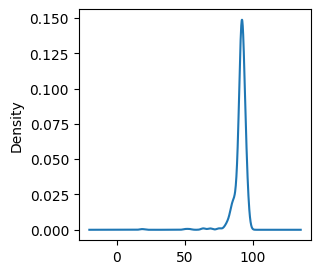

In [513]:
data['FFMC'].plot(kind='density',  figsize=(3,3))

<Axes: ylabel='Density'>

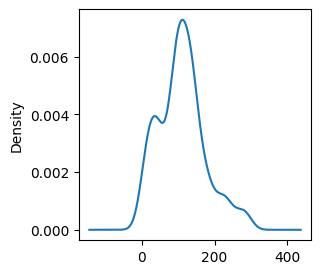

In [514]:
data['DMC'].plot(kind='density',  figsize=(3,3))

<Axes: ylabel='Density'>

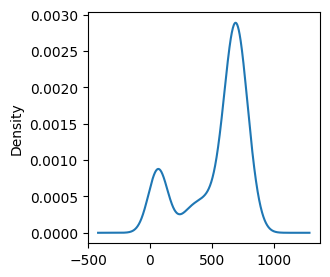

In [515]:
data['DC'].plot(kind='density', figsize=(3,3))

<Axes: ylabel='Density'>

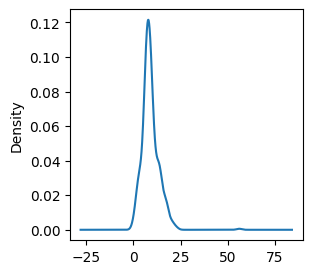

In [516]:
data['ISI'].plot(kind='density',  figsize=(3,3))

<Axes: ylabel='Density'>

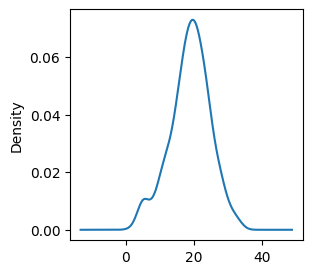

In [517]:
data['temp'].plot(kind='density',  figsize=(3,3))

<Axes: ylabel='Density'>

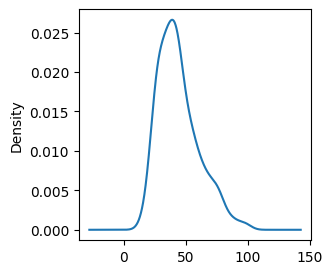

In [518]:
data['RH'].plot(kind='density',  figsize=(3,3))

<Axes: ylabel='Density'>

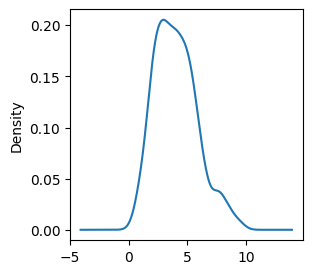

In [519]:
data['wind'].plot(kind='density',  figsize=(3,3))

<Axes: ylabel='Density'>

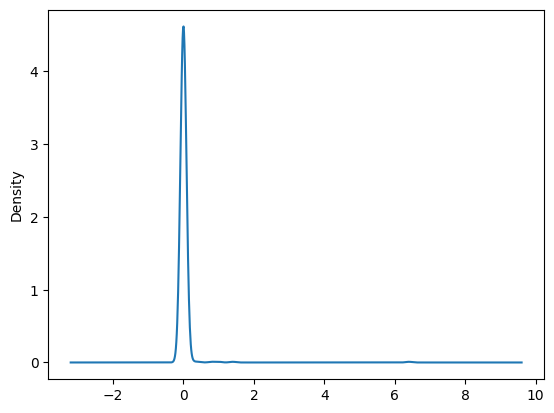

In [520]:
data['rain'].plot(kind='density')

<Axes: xlabel='month'>

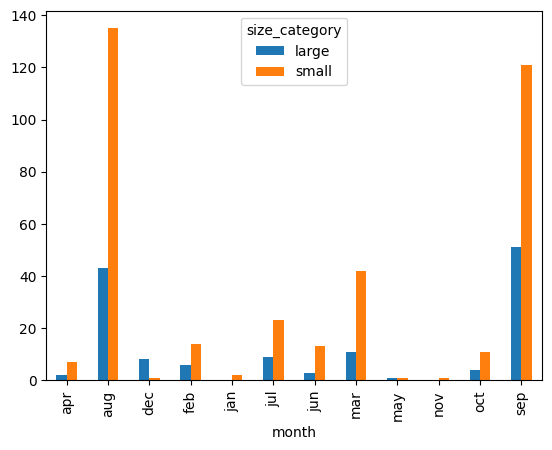

In [521]:
pd.crosstab(data['month'], data['size_category']).plot(kind='bar')

<Axes: xlabel='day'>

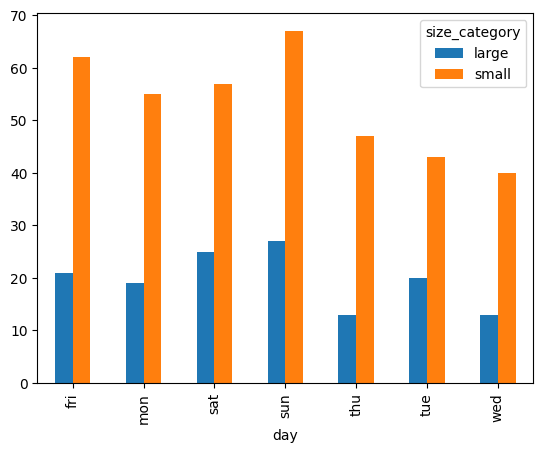

In [522]:
pd.crosstab(data['day'], data['size_category']).plot(kind='bar')

<Axes: xlabel='month', ylabel='day'>

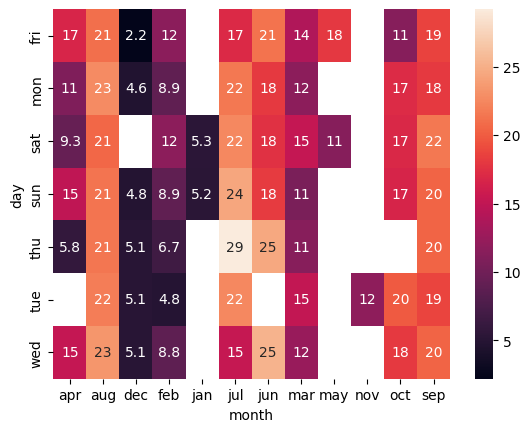

In [523]:
pivot=data.pivot_table(index='day', columns='month', values='temp')
sns.heatmap(pivot, annot=True)

<Axes: ylabel='size_category'>

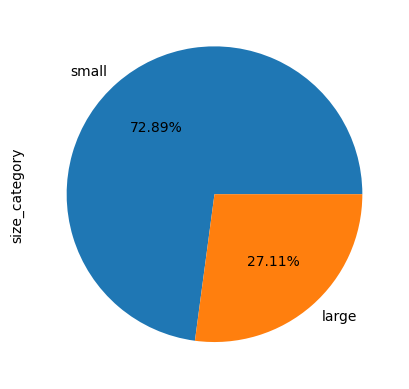

In [524]:
data['size_category'].value_counts().plot(kind='pie', autopct='%1.2f%%')

#MODEL BUILDING

In [525]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [526]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [527]:
data=data.drop(['month','day'], axis=1)

In [528]:
data.shape

(509, 29)

In [529]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']]=scaler.fit_transform(data[['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']])

In [530]:
data.head(1)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.79604,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.49437,-0.069035,-0.202791,1,...,0,0,0,0,1,0,0,0,0,small


In [531]:
from sklearn.model_selection import train_test_split
X=data.drop('size_category', axis=1)
Y=data['size_category']

In [532]:
X.shape

(509, 28)

In [533]:
Y.shape

(509,)

In [534]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=0)

In [535]:
X_train.shape

(407, 28)

In [536]:
X_test.shape

(102, 28)

In [537]:
Y_train.shape

(407,)

In [538]:
Y_test.shape

(102,)

In [539]:
#linear
from sklearn.svm import SVC
model_L=SVC(kernel='linear')
model_L.fit(X_train, Y_train)
pred_L=model_L.predict(X_test)
acc_L=np.mean(Y_test==pred_L)
acc_L

0.9607843137254902

In [540]:
#poly
model_P=SVC(kernel='poly')
model_P.fit(X_train, Y_train)
pred_P=model_P.predict(X_test)
acc_P=np.mean(Y_test==pred_P)
acc_P

0.7843137254901961

In [541]:
#gridsearchcv on gamma and C when kernel = 'linear
gamma=[0.1,0.01,0.5]
C=[1,0.1,10,50,100]
model=SVC(kernel='linear')
param_grid=dict(gamma=gamma, C=C)
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model, param_grid=param_grid)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 0.1, 10, 50, 100], 'gamma': [0.1, 0.01, 0.5]})

In [542]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.1}
0.9631436314363142


In [543]:
model_L=SVC(kernel='linear',gamma=0.1, C=10)
model_L.fit(X_train, Y_train)
pred_L=model_L.predict(X_test)
acc_L=np.mean(Y_test==pred_L)
acc_L

0.9901960784313726

In [544]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
classification_report=classification_report(Y_test, pred_L)
print(classification_report)

              precision    recall  f1-score   support

       large       0.96      1.00      0.98        25
       small       1.00      0.99      0.99        77

    accuracy                           0.99       102
   macro avg       0.98      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



In [545]:
confusion_matrix(Y_test, pred_L)

array([[25,  0],
       [ 1, 76]])

In [546]:
#validating the model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model=SVC(kernel='linear', gamma=0.1, C=10)
kf=KFold(n_splits=10)
results=cross_val_score(model, X_train, Y_train, cv=kf)
results.mean()*100

96.8048780487805

In [547]:
#gridsearchcv on gamma and C when kernel = 'rbf'
gamma=[0.1,0.01,0.5]
C=[1,0.1,10,50,100]
model=SVC(kernel='rbf')
param_grid=dict(gamma=gamma, C=C)
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model, param_grid=param_grid)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 0.1, 10, 50, 100], 'gamma': [0.1, 0.01, 0.5]})

In [548]:
print(grid.best_params_)
print(grid.best_score_)     #C=100 , higher the penalty, lesser tolerance, hard margin, model can be overfitted

{'C': 100, 'gamma': 0.01}
0.9092140921409214


In [549]:
#rbf
model_R=SVC(kernel='rbf', gamma=0.01, C=100)
model_R.fit(X_train, Y_train)
pred_R=model_R.predict(X_test)
acc_R=np.mean(Y_test==pred_R)
acc_R

0.9803921568627451

In [550]:
#SIGMOID
model_S=SVC(kernel='sigmoid')
model_S.fit(X_train, Y_train)
pred_S=model_S.predict(X_test)
acc_S=np.mean(Y_test==pred_S)
acc_S

0.8235294117647058

In [551]:
#classification model was built on the given data using SVM and highest accuracy of 99% was obtained when kernel was linear, gamma=0.1 and C=10, model validation is also performed and accuracy of the model was found to be 96%